## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pickle
import matplotlib.pyplot as plt
#%inline matplotlib

### Load test data input and output

In [2]:
Dataset=pd.DataFrame()
Dataset.drop(Dataset.columns,axis=1,inplace=True)
Dataset=pd.read_excel('TEST.xlsx')
Y_test=pd.read_excel('SAMPLE_SUBMISSION_OUT.xlsx')

### modeling the test data set as similar to train one

In [3]:
x_columns=pickle.load(open("X_columns.pickle","rb"))
pred=pd.DataFrame(0,columns=x_columns,index=Dataset.index)

def tras(para):
    for i,airlines in zip(Dataset[para].index,Dataset[para]):
        try:
            pred[airlines][i]=1
        except:
            pass
    return True
    


In [4]:
def Stops(para):
    for i,stops in zip(Dataset[para].index,Dataset[para]):
        if stops == '1 stop':
            pred['Num_stops'][i]=1
        elif stops == '2 stops':
            pred['Num_stops'][i]=2
        elif stops == '3 stops':
            pred['Num_stops'][i]=3    
        elif stops == '3 stops':
            pred['Num_stops'][i]=4
        else:
            pred['Num_stops'][i]=0

  

In [5]:
def Weekpred(para):
    for i,date in zip(Dataset[para].index,Dataset[para]):
        day_num=datetime.datetime.strptime(date,'%d/%m/%Y').weekday()
        if day_num  in [0,1,2,3,4]:
            pred['Weekday'][i] = 1
        else:
            pred['Weekend'][i] = 1

  

In [6]:
#journy hours
def journy_time(para):
    if 'm' in para and 'h' in para:
        h,m=para.split()
        h,m=int(h[:-1]),int(m[:-1])
        return (h*60+m)/60
    elif 'm' in para:
        m=para[:-1]
        return int(m)/60
    else:
        h=para[:-1]
        return int(h)


In [7]:
def route(para):
    for y in para.split('→'):
        pred[y.strip()]=1
    return None

In [8]:
tras('Airline')
tras('Departure Station')
tras('Arrival Station')
tras('Extra Info')
Stops('Stops')
Weekpred('Date')
pred['Journy_hrs']=Dataset.apply(lambda x:journy_time(x['Journey Time']),axis=1)
pred['Journy_log_hrs']=pred['Journy_hrs'].apply(lambda x:np.log1p(x))
pred['Journy_root_hrs']=pred['Journy_hrs'].apply(lambda x:x**0.5)
pred['journy*stops_log']=np.log1p(pred['Journy_root_hrs']*pred['Num_stops'])
a=Dataset['Route Map'].apply(lambda x: route(x))

In [9]:
pred=pred.drop(columns='Journy_hrs',axis=1)

In [10]:
pickle_in = open("Model.pickle","rb")
Model = pickle.load(pickle_in)
Y_pred=Model.predict(pred)
mse = mean_squared_error(Y_pred,Y_test)
print("MSE: %.4f" % mse)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 scoreis : ',r2_score(Y_test, Y_pred))

MSE: 20948068.8237
Root Mean Squared Error: 4576.906031770693
R2 scoreis :  0.024128710181977042


### Export the predicted procce to directory

In [11]:
pd.DataFrame(Y_pred,columns=['Pridicted_price']).to_excel("Price_predict.xlsx")

### Barchat representaton of Actual price VS Predicted price

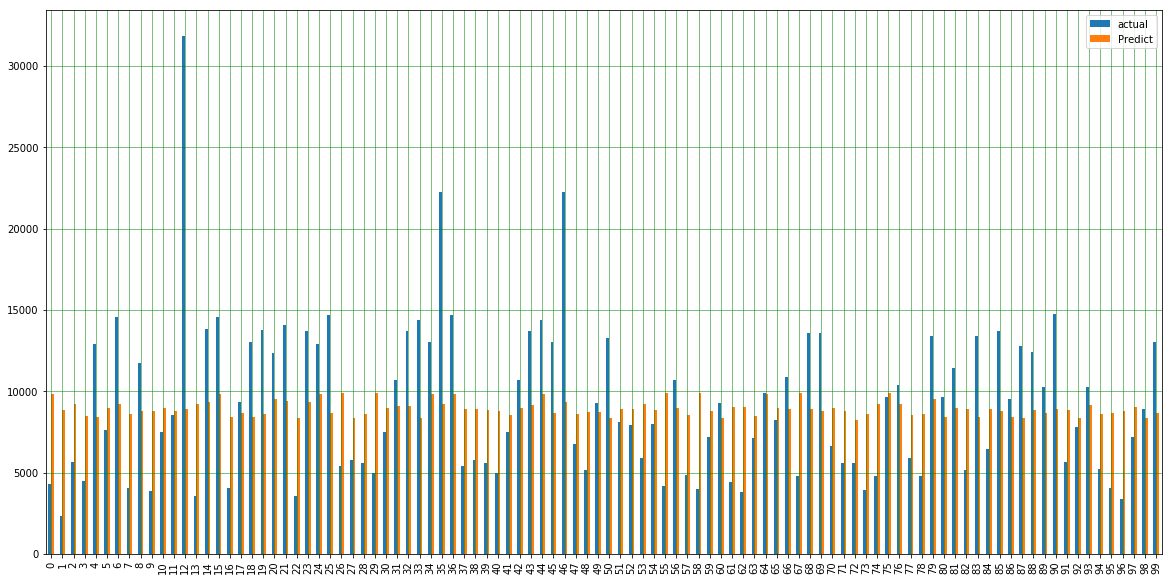

In [12]:
df_comp=pd.DataFrame({'actual':Y_test['Price'],'Predict':Y_pred})

df1 = df_comp.head(100)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Scatter plot representaton of Actual price VS Predicted price

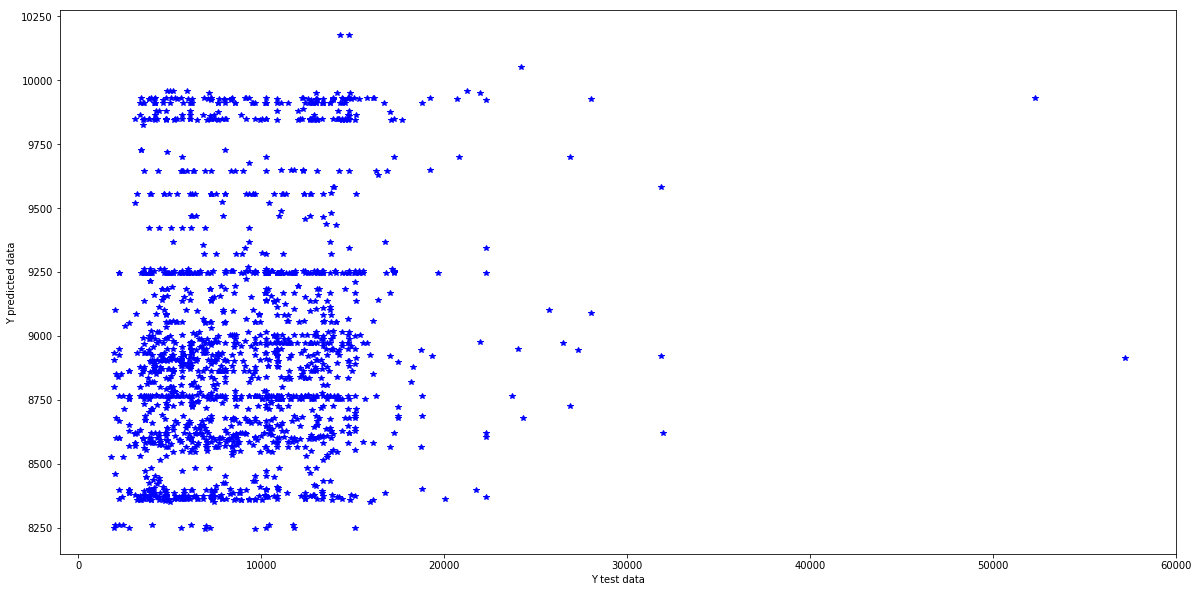

In [13]:
plt.figure(figsize=(20,10))
plt.plot(Y_test['Price'],Y_pred,'*b')
plt.xlabel('Y test data')
plt.ylabel('Y predicted data')
plt.show()

### Input features repesentation i histogram

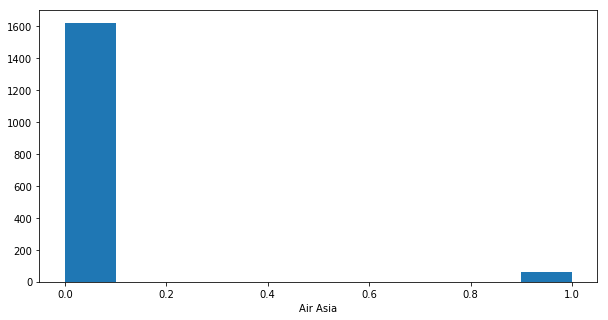

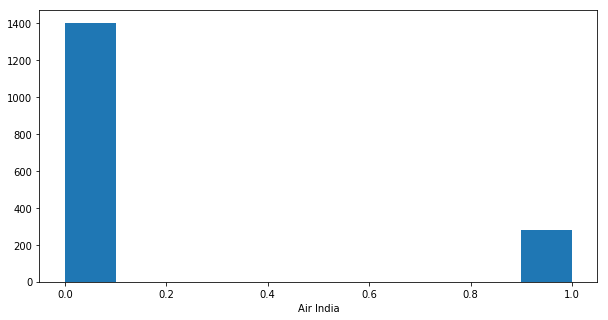

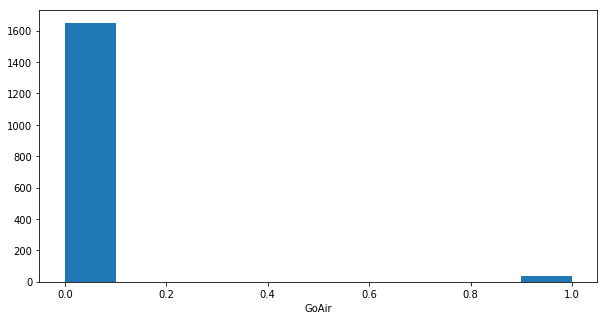

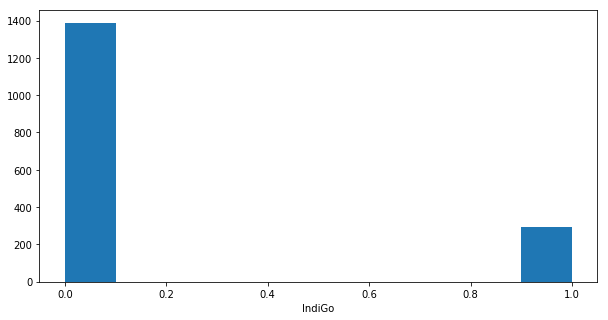

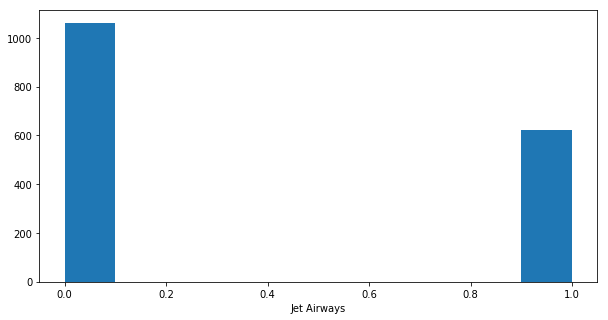

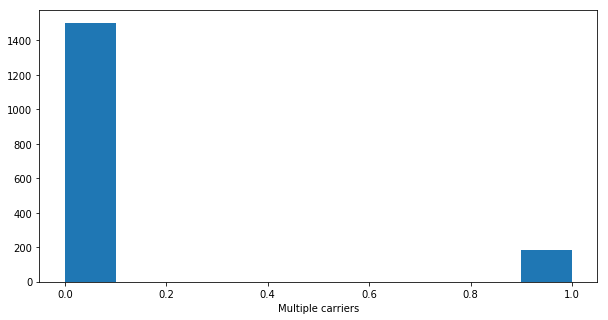

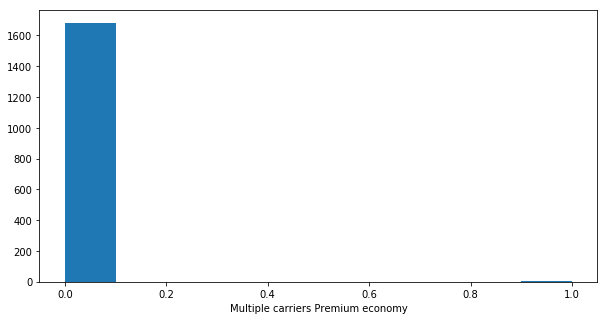

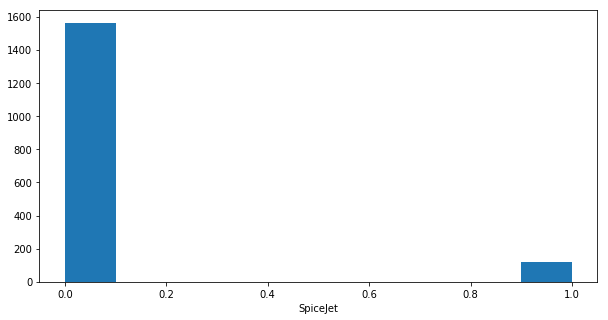

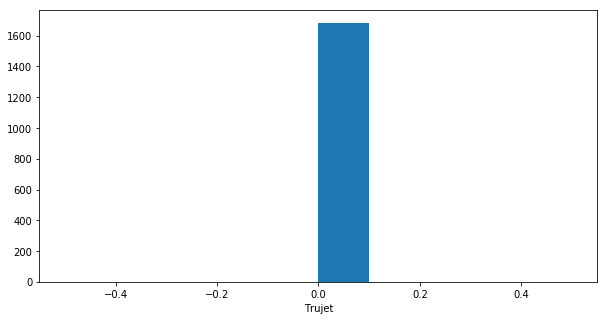

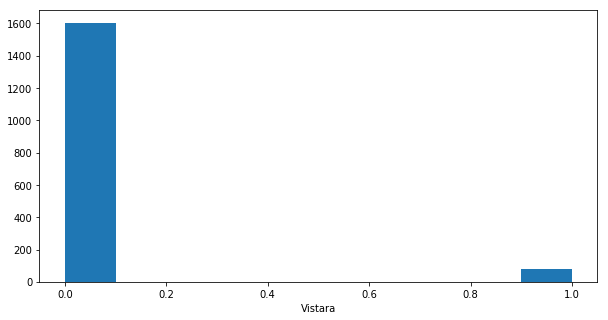

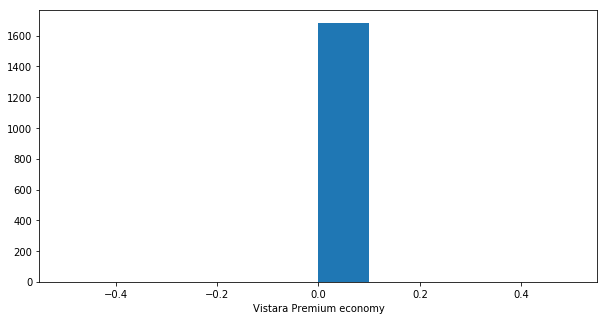

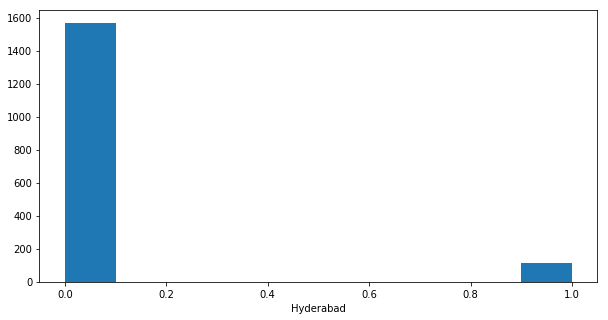

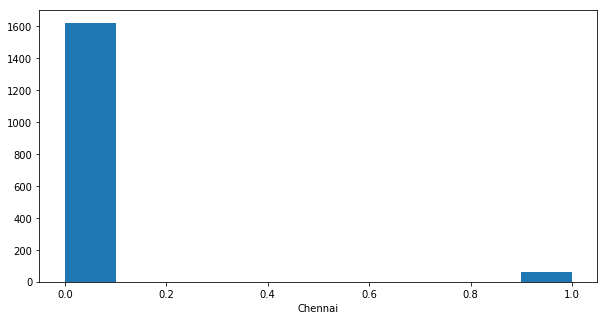

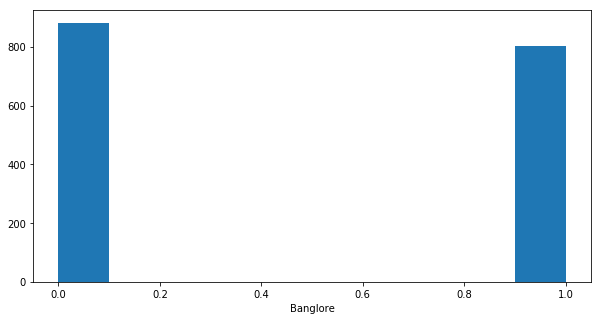

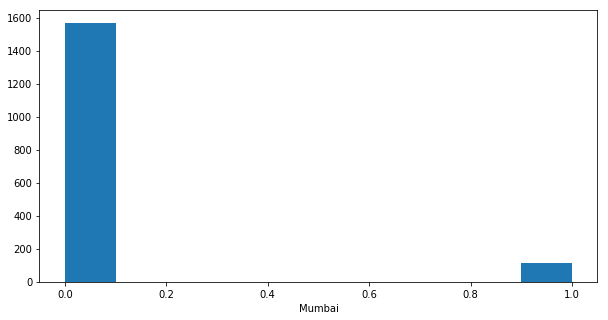

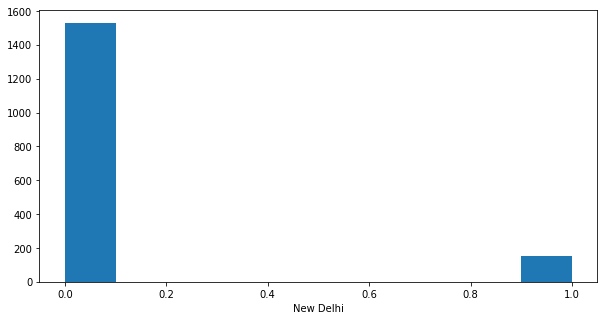

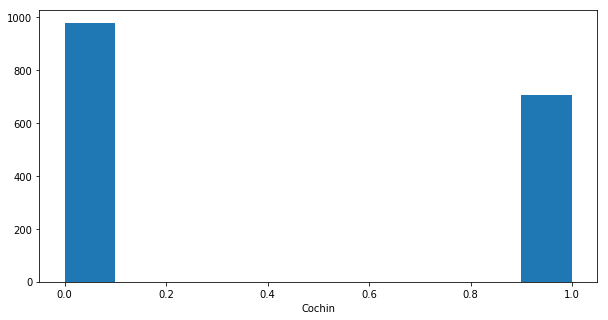

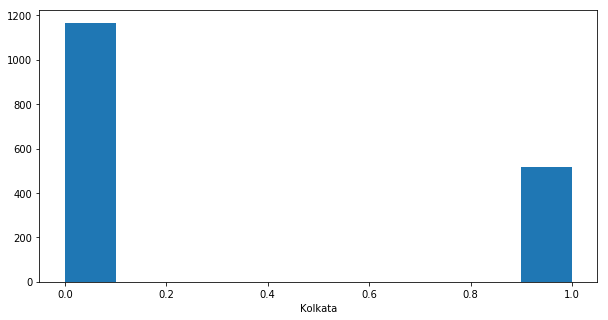

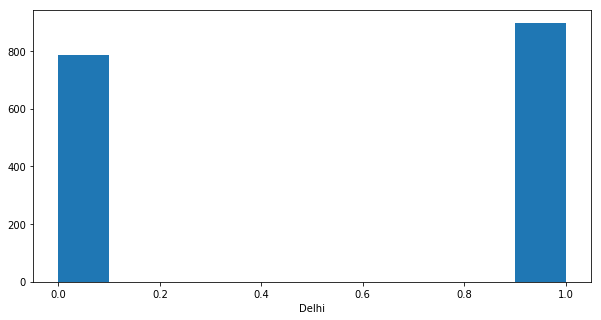

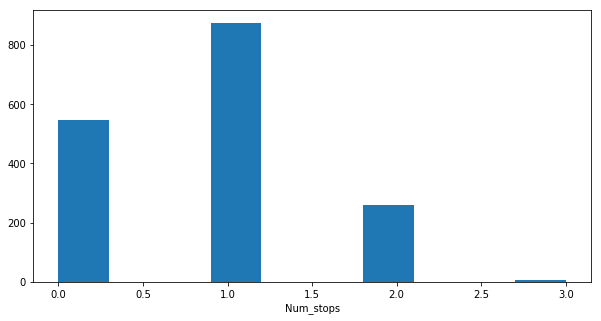

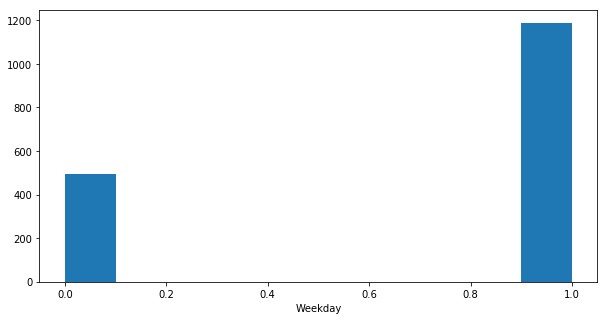

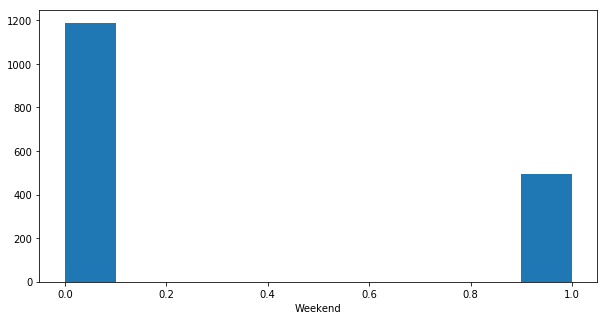

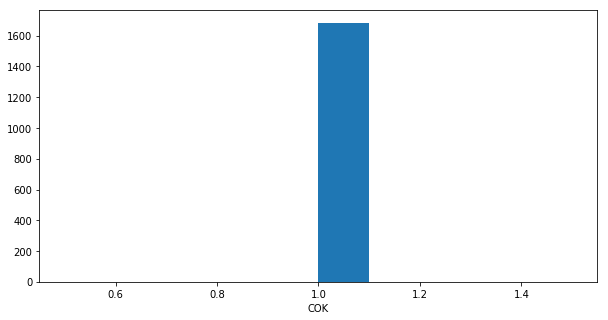

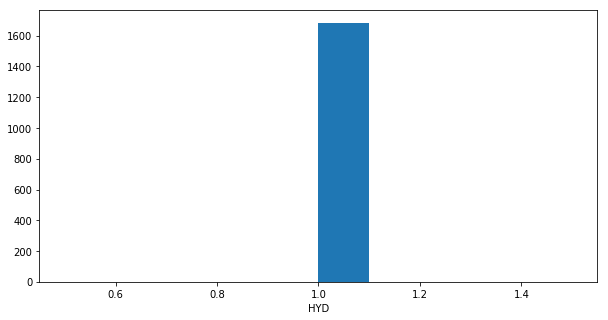

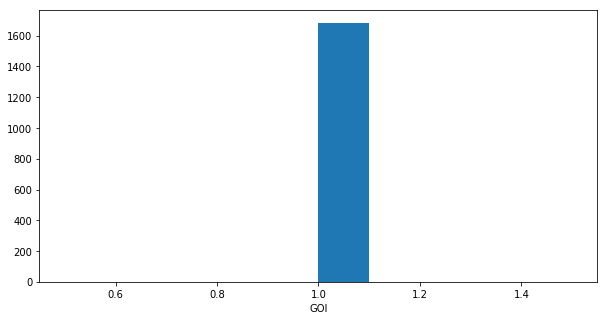

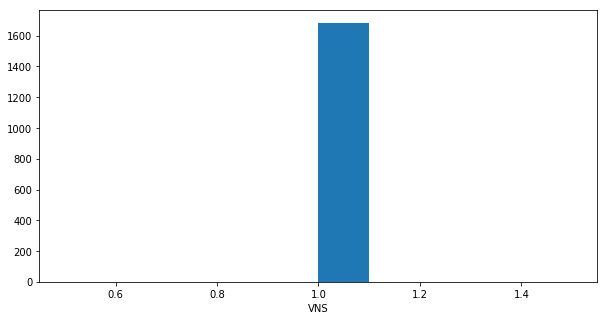

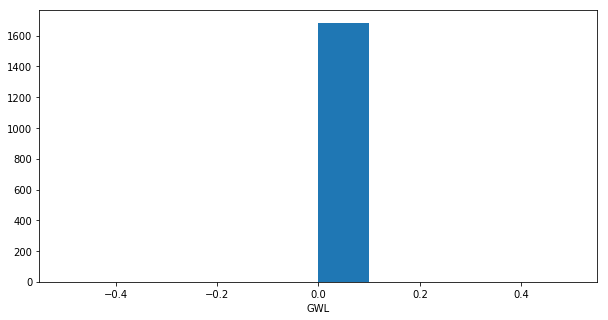

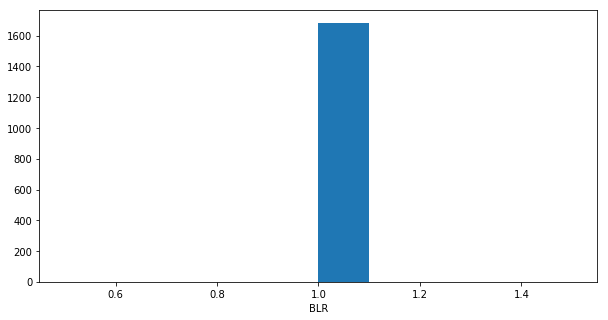

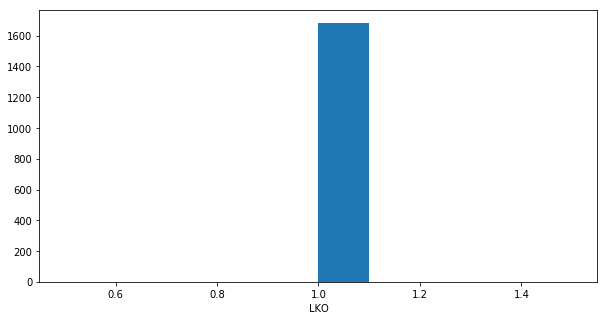

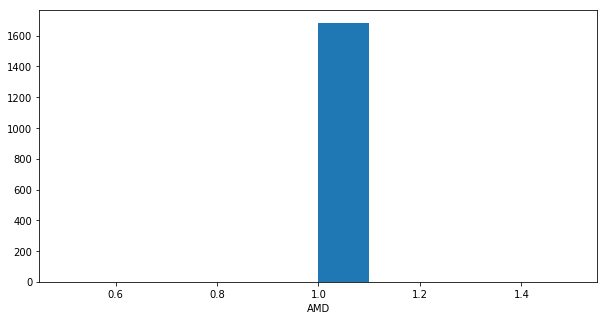

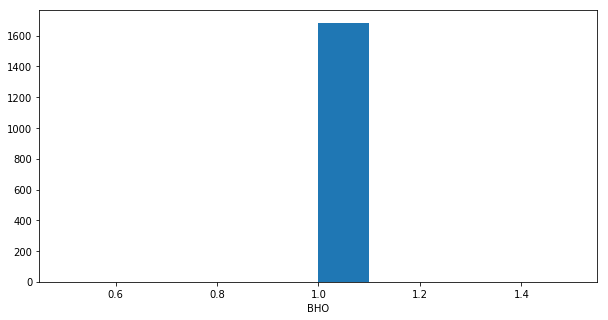

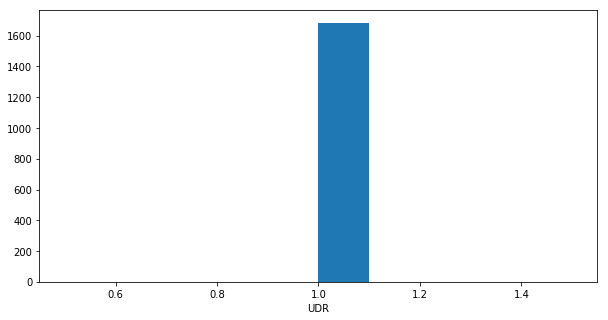

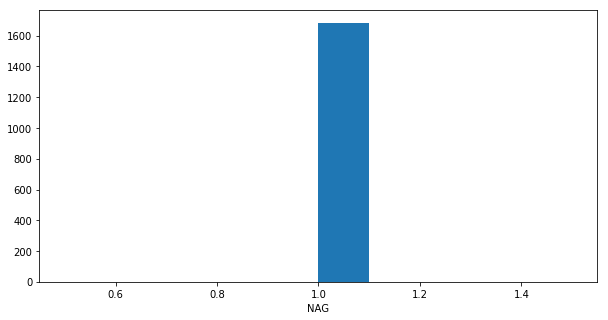

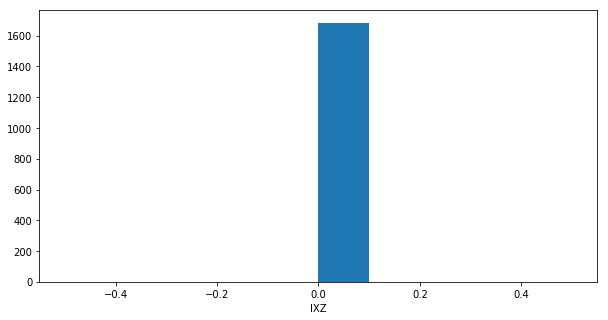

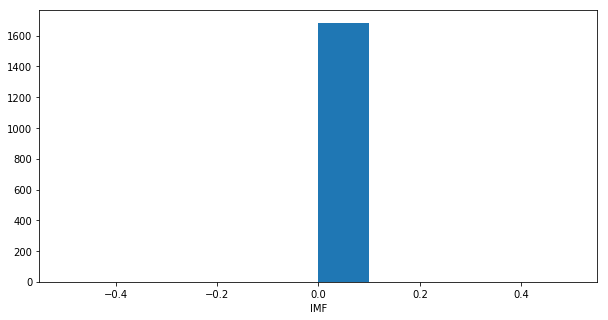

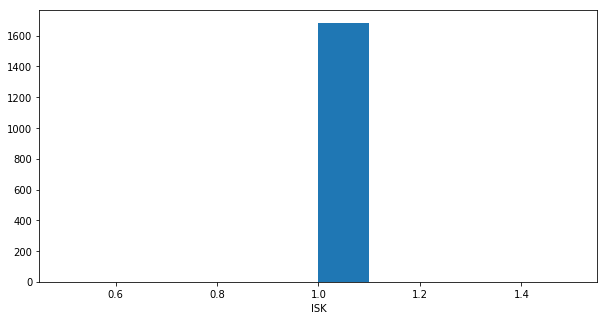

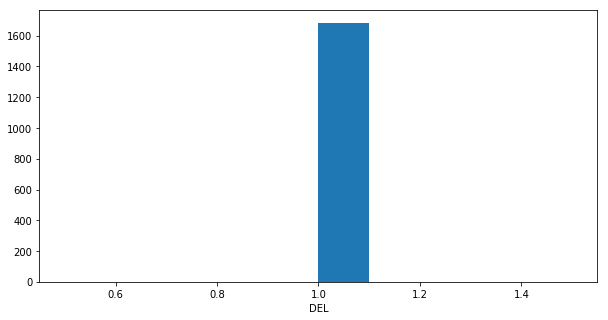

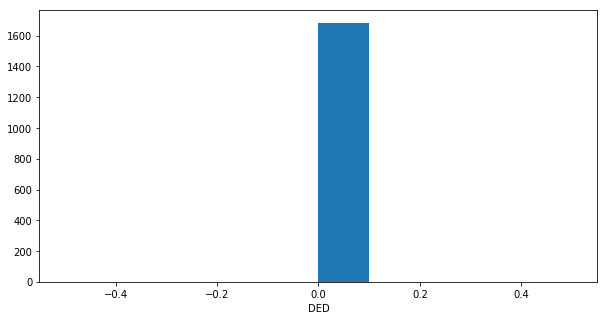

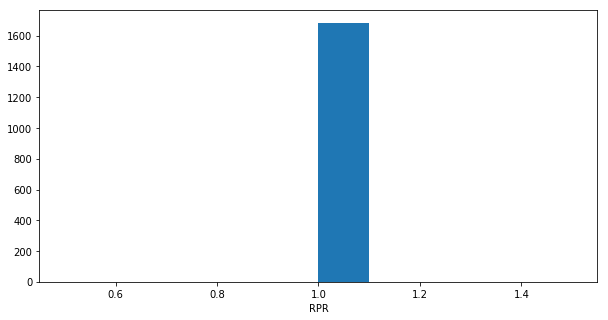

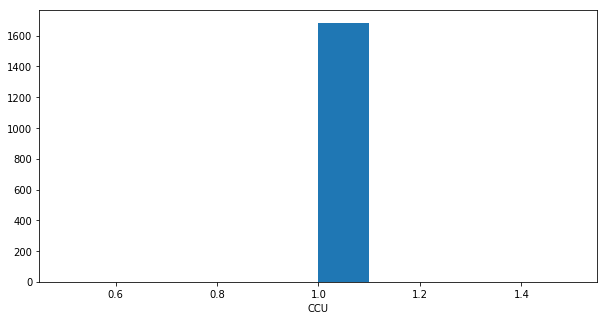

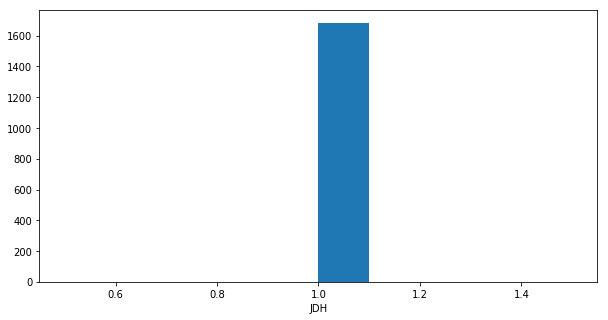

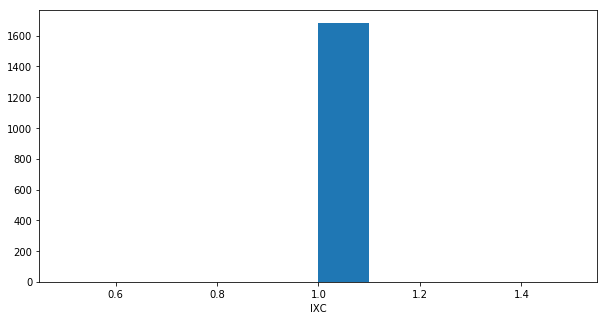

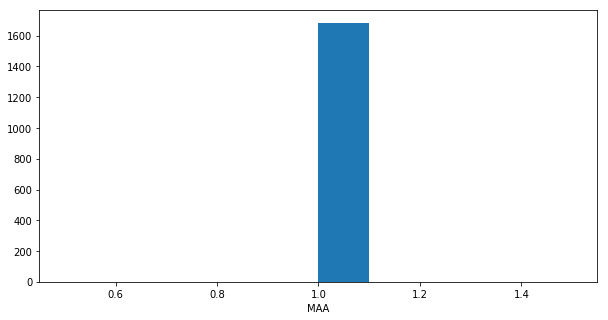

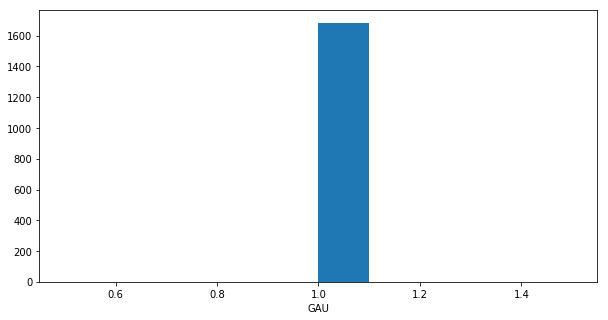

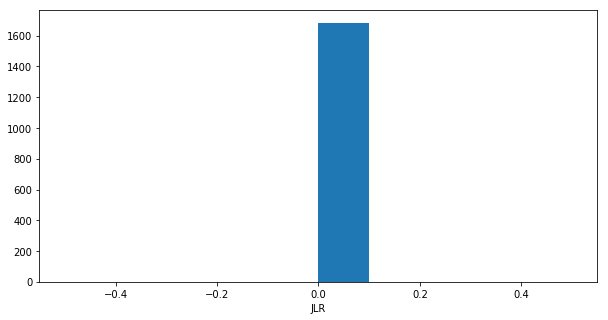

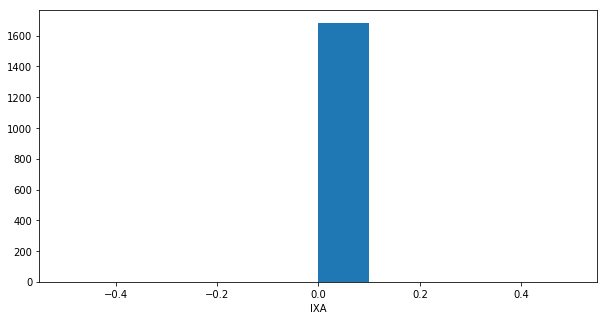

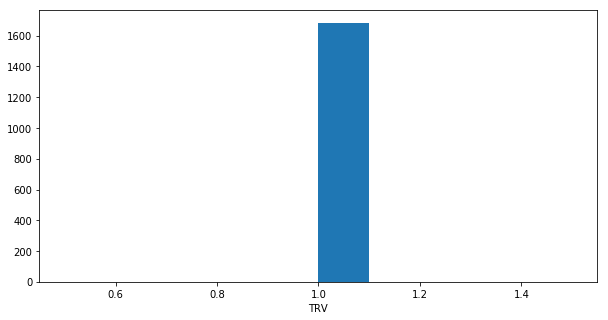

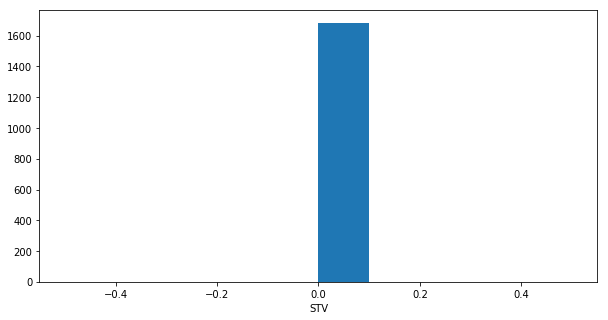

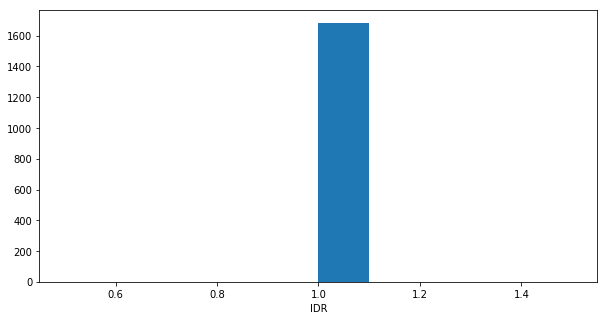

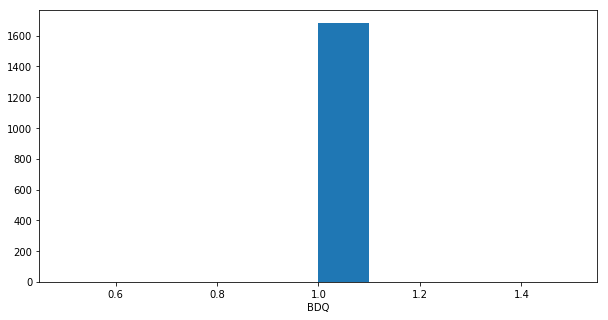

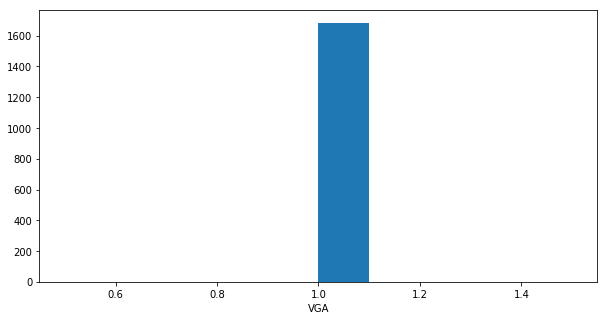

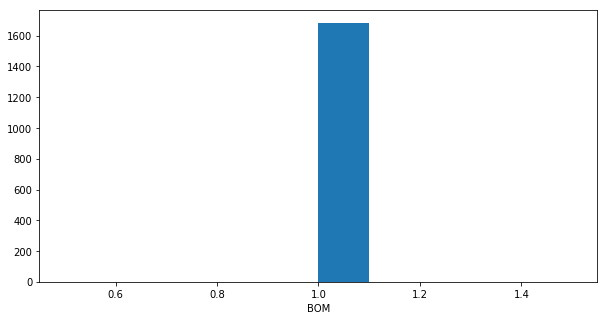

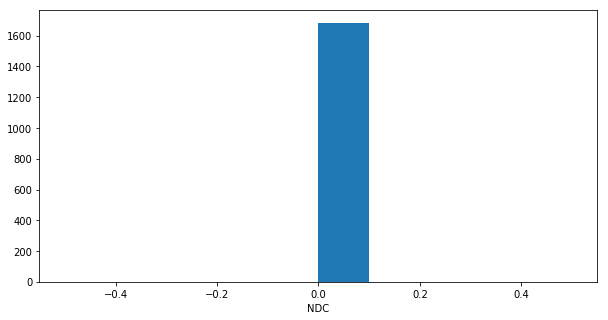

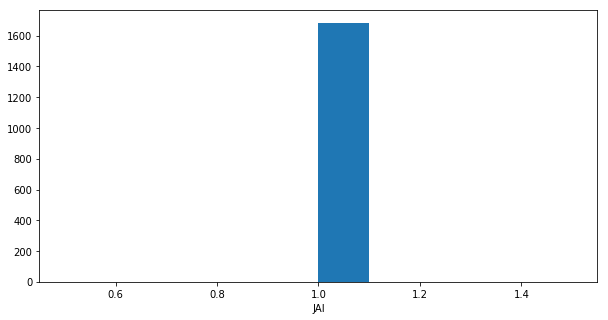

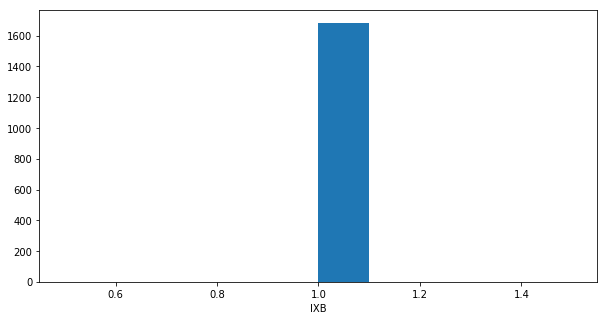

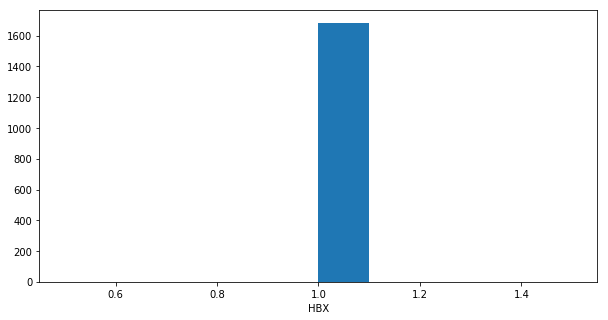

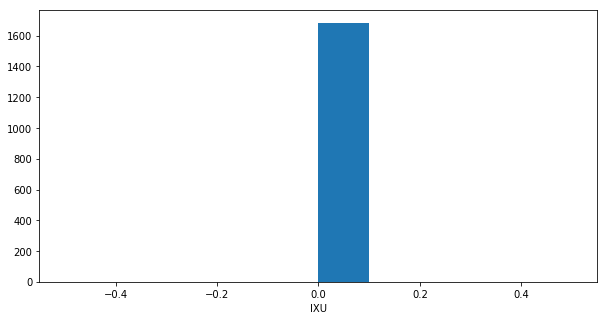

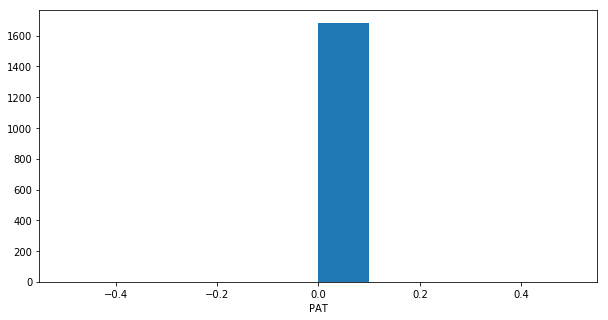

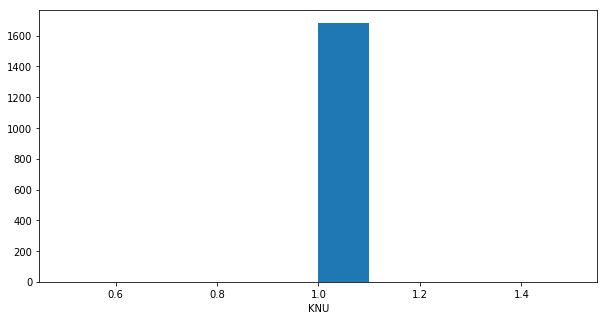

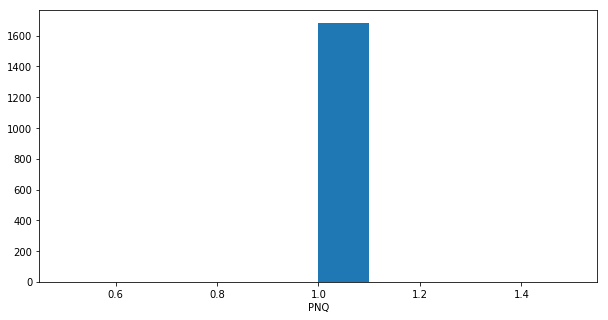

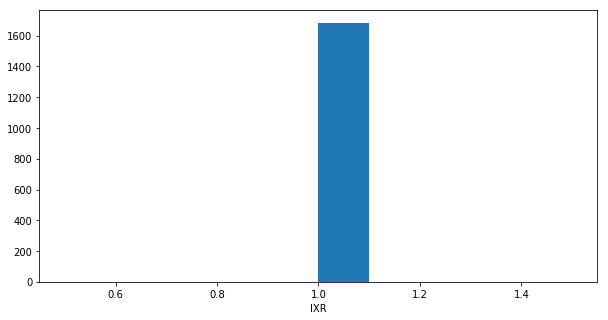

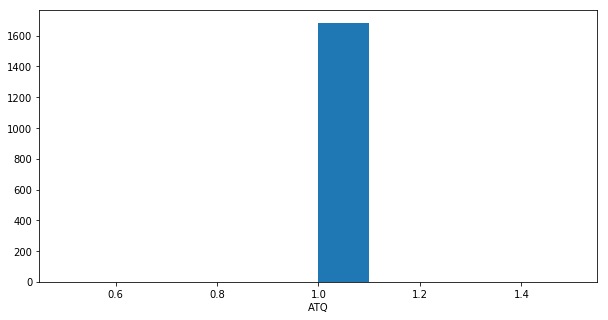

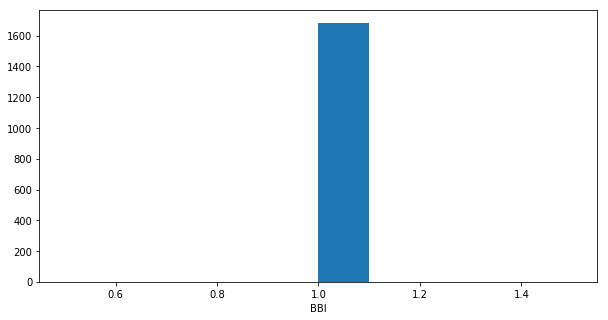

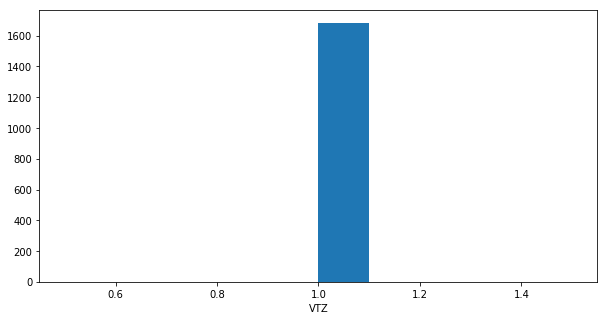

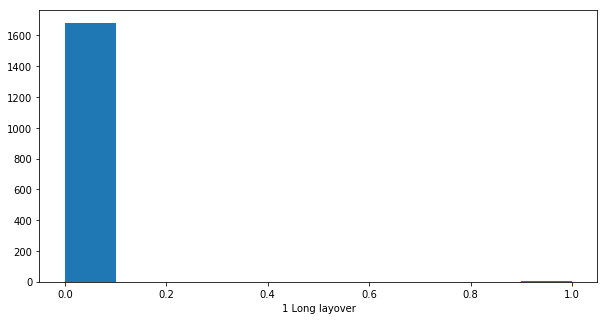

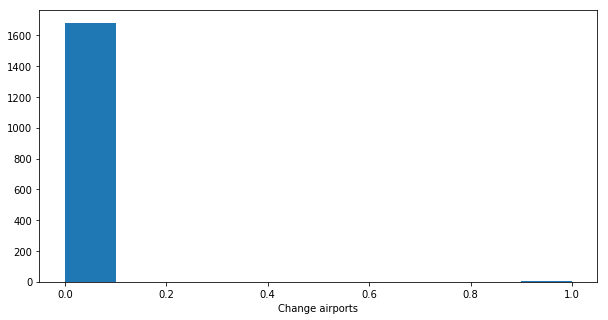

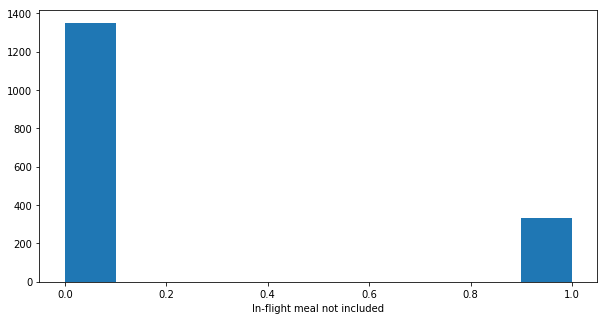

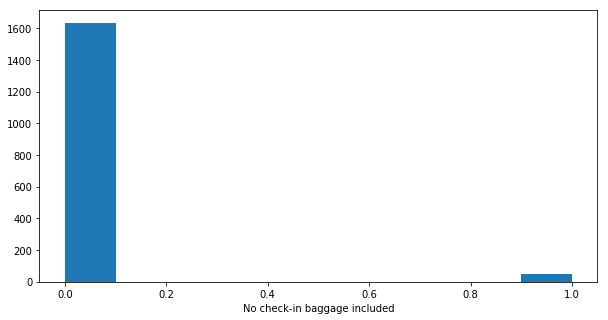

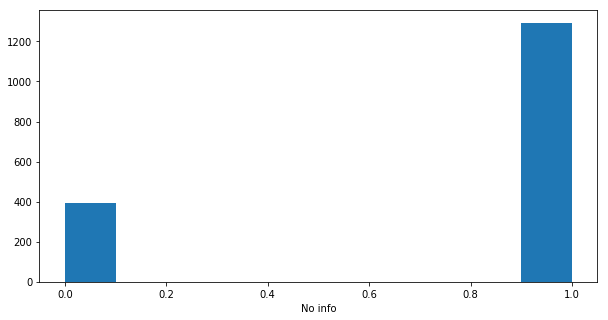

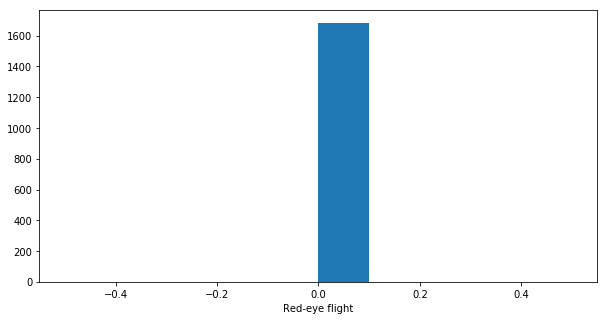

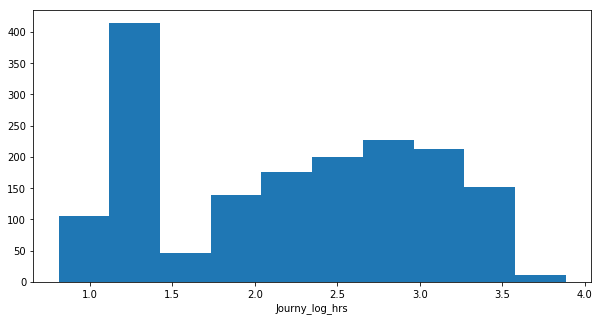

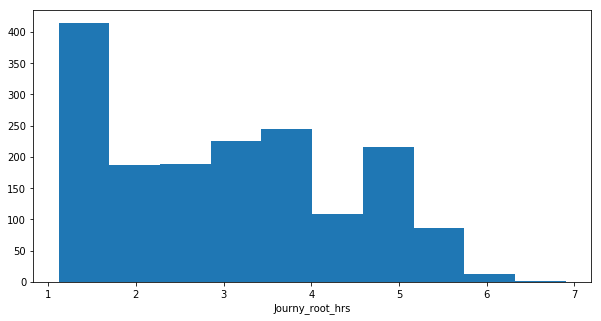

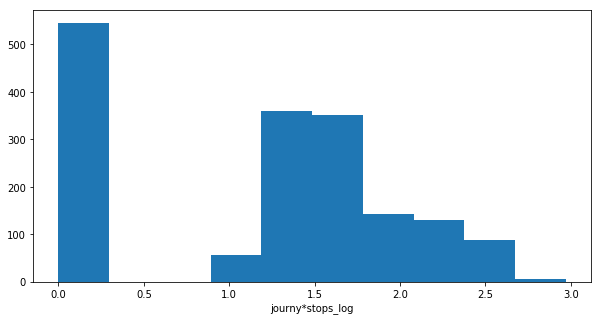

In [14]:
for i in list(pred.columns):
    plt.figure(figsize=(10,5))
    plt.hist(pred[i])
    plt.xlabel(i)
    plt.show()